In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from requests import get
%matplotlib inline

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from sklearn.metrics import r2_score

In [3]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [4]:
adr = get('https://api.ipify.org').text
sourceip = "https://stat.ripe.net/data/whois/data.json?resource="+adr+"%2F24"
responseip = requests.get(sourceip).json()
#asn_code = responseip["data"]["irr_records"][0][1]["value"]
asn_code =206472

In [5]:
url = 'https://stat.ripe.net/data/bgp-update-activity/data.json?endtime=2022-04-11T12%3A00%3A00&hide_empty_samples=false&max_samples=10000&resource=AS'+str(asn_code)+'&starttime=2021-04-11T00%3A00%3A00'
r = requests.get(url)
json = r.json()
df = pd.DataFrame(json['data']['updates'])
df

,announcements,starttime,withdrawals
0,0,2021-04-11T00:00:00,None
1,6,2021-04-11T01:00:00,None
2,9,2021-04-11T02:00:00,None
3,5,2021-04-11T03:00:00,None
4,7,2021-04-11T04:00:00,None
5,0,2021-04-11T05:00:00,None
6,0,2021-04-11T06:00:00,None
7,5,2021-04-11T07:00:00,None
8,0,2021-04-11T08:00:00,None
9,5,2021-04-11T09:00:00,None


In [6]:
df["starttime"]=pd.to_datetime(df.starttime,format="%Y-%m-%d")
df.index=df['starttime']
df

,announcements,starttime,withdrawals
starttime,,,
2021-04-11 00:00:00,0,2021-04-11 00:00:00,None
2021-04-11 01:00:00,6,2021-04-11 01:00:00,None
2021-04-11 02:00:00,9,2021-04-11 02:00:00,None
2021-04-11 03:00:00,5,2021-04-11 03:00:00,None
2021-04-11 04:00:00,7,2021-04-11 04:00:00,None
2021-04-11 05:00:00,0,2021-04-11 05:00:00,None
2021-04-11 06:00:00,0,2021-04-11 06:00:00,None
2021-04-11 07:00:00,5,2021-04-11 07:00:00,None
2021-04-11 08:00:00,0,2021-04-11 08:00:00,None


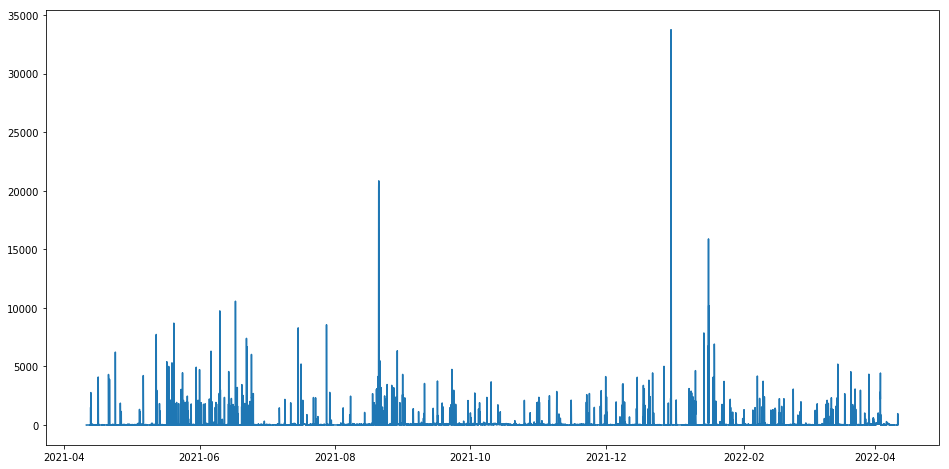

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df["announcements"],label='announcements')

In [8]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['starttime','announcements'])
for i in range(0,len(data)):
    new_dataset["starttime"][i]=data['starttime'][i]
    new_dataset["announcements"][i]=data["announcements"][i]
new_dataset["starttime"]= pd.to_numeric(pd.to_datetime(new_dataset["starttime"]))


In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

In [11]:
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [12]:
new_dataset.index=new_dataset.starttime
new_dataset.drop("starttime",axis=1,inplace=True)

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)

In [14]:
x_train_data,y_train_data=[],[]

In [15]:
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))


In [16]:
lstm_model=Sequential()
lstm_model.add(LSTM(32,input_shape=(x_train_data.shape[1],1),activation='relu',return_sequences=False))
lstm_model.add(Dense(1))



In [17]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


In [18]:
from keras import metrics
lstm_model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_absolute_percentage_error'])
#lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
history=lstm_model.fit(x_train_data, y_train_data, epochs=50, batch_size=8, verbose=1, shuffle=False)

Epoch 1/50
116/116 [==============================] - 17s 18ms/step - loss: 2.3422e-04 - mean_absolute_percentage_error: 732675.4546
Epoch 2/50
116/116 [==============================] - 3s 22ms/step - loss: 2.6947e-04 - mean_absolute_percentage_error: 1376780.4263
Epoch 3/50
116/116 [==============================] - 3s 22ms/step - loss: 2.6773e-04 - mean_absolute_percentage_error: 1119368.2585
Epoch 4/50
116/116 [==============================] - 3s 22ms/step - loss: 2.5709e-04 - mean_absolute_percentage_error: 1288368.5443
Epoch 5/50
116/116 [==============================] - 3s 22ms/step - loss: 2.6107e-04 - mean_absolute_percentage_error: 1090215.1693
Epoch 6/50
116/116 [==============================] - 3s 22ms/step - loss: 2.5861e-04 - mean_absolute_percentage_error: 1209701.4567
Epoch 7/50
116/116 [==============================] - 2s 21ms/step - loss: 2.4129e-04 - mean_absolute_percentage_error: 891546.3467
Epoch 8/50
116/116 [==============================] - 3s 22ms/step - l

In [19]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [20]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_state=lstm_model.predict(X_test)
predicted_state=scaler.inverse_transform(predicted_state)

In [21]:
predicted_state.flatten()

array([396.67438, 396.53305, 396.32938, ..., 395.13455, 557.76996,
       476.25433], dtype=float32)

In [22]:
valid_data

array([[1621652400000000000, 10],
       [1621656000000000000, 10],
       [1621659600000000000, 10],
       ...,
       [1649667600000000000, 975],
       [1649671200000000000, 31],
       [1649674800000000000, 22]], dtype=object)

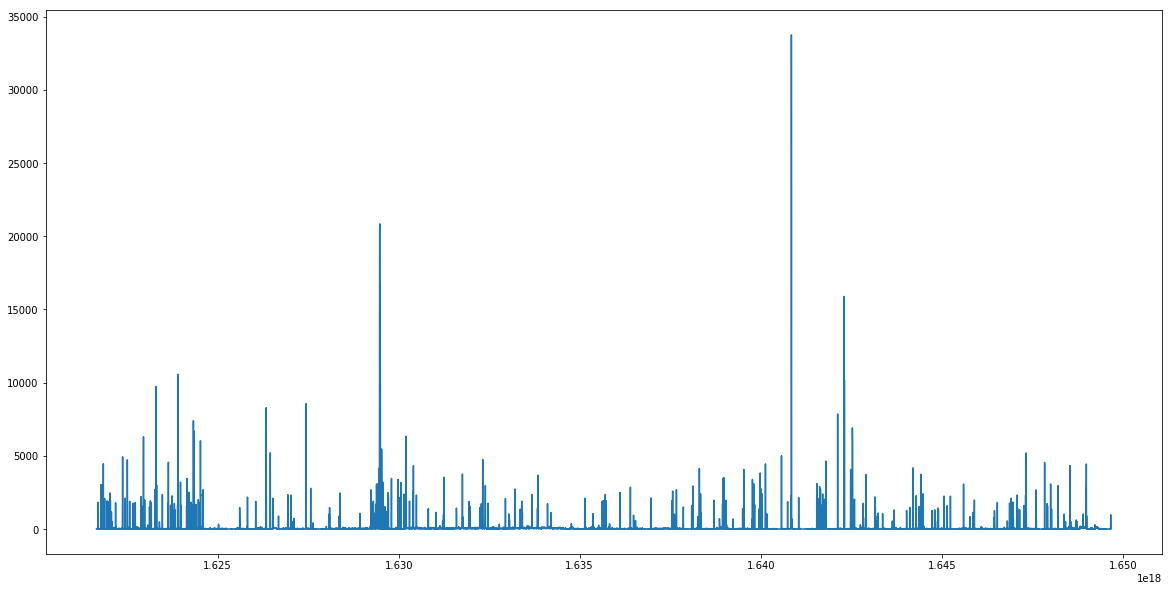

In [23]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
#plt.plot(train_data["announcements"])
plt.plot(valid_data['announcements'])

In [24]:
# j=0
# for i in valid_data['announcements']:
#     s=abs(predicted_state[j][0]-i)
#     ++j
#     print(predicted_state[j],i,s)

In [25]:
# j=0
# while(j<475):
#     print(predicted_state[1][0])
#     ++j
